# Customer type behaviours in Ford GoBike System
## by sachin

## Investigation Overview

In this presentation, I will compare the two types of Customers in Ford GoBike 
System Dateset, customers and subscribers, in the following features:
    <li>Distance travel</li>
    <li>Year of birth</li>
    <li>Trip duration</li>
    
## Dataset Overview
Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("master_data_frame.csv",index_col=0)

In [3]:
# functions to fix types
def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)
    return df

def change_to_category(df,fields):
    for field in fields:
        df[field] = df[field].astype('category')
    return df

In [4]:
# fix types (again)
df = change_to_string (df,['start_station_id', 'end_station_id','bike_id'])
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df = change_to_category (df,['user_type', 'member_gender'])

## Amount of Customers vs Amount of Subscribers

In the dataset, there are more Subscriber than Customers.

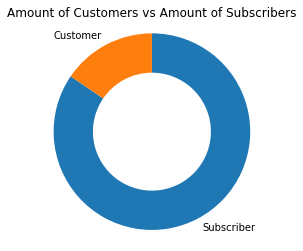

In [9]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title("Amount of Customers vs Amount of Subscribers");

## Distance travel vs Customer type

subscribers are more likey to take short length trips, while customers are more likey to take long length trips.

note: outliers where removed from this plot. 

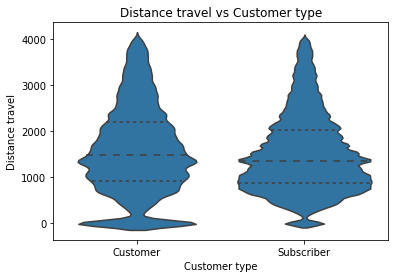

In [15]:
sns.violinplot(data = df.query("distance <= 2133+ 1.5*1247"),x = 'user_type',y='distance',color = sns.color_palette()[0],inner='quartile');
plt.title("Distance travel vs Customer type");
plt.xlabel("Customer type");
plt.ylabel("Distance travel");

## Year of birth  vs Customer type

They are no significant age difference between the groups.

note: Year of birth axis starts at 1940.

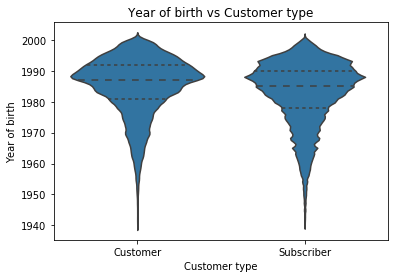

In [17]:
sns.violinplot(data = df.query("member_birth_year >= 1940"),x = 'user_type',y='member_birth_year',color = sns.color_palette()[0],inner='quartile');
plt.title("Year of birth vs Customer type");
plt.xlabel("Customer type");
plt.ylabel("Year of birth");

## Trip duration vs Customer type

subscribers are more likey to take short trip duration, while customers are more likey to take long trip duration.

note: outliers where removed from this plot. 

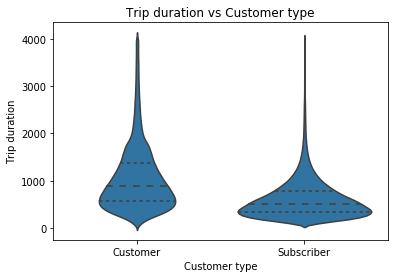

In [18]:
sns.violinplot(data = df.query("duration_sec <= 4039.5"),x = 'user_type',y='duration_sec',color = sns.color_palette()[0],inner='quartile');
plt.title("Trip duration vs Customer type");
plt.xlabel("Customer type");
plt.ylabel("Trip duration");

## Distance travel vs Year of birth vs Customer type

Subscribers are more likey travel from 500 to 1500m and are between 20 - 30 year old

Customers are more likey travel from 1000 to 2000m and are between 20 - 30 year old

note: 
    <li>outliers where removed from this plot.</li>
    <li>Year of birth axis starts at 1940.</li>
    <li>only 10% of the data was used in this plot.</li>

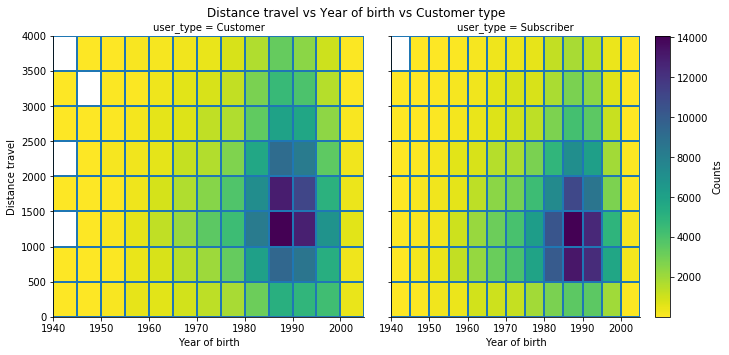

In [35]:
xbin = np.arange(1940, df['member_birth_year'].max()+5, 5)
ybin = np.arange(0, (2133+ 1.5*1247)+500, 500)

df_temp = df.sample(300000, random_state=42)
g = sns.FacetGrid(data = df_temp, col = 'user_type',height=5)
g.map(plt.hist2d, 'member_birth_year','distance',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');
plt.ylim((0,(2133+ 1.5*1247)));

## code copie from
## https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distance travel vs Year of birth vs Customer type");

g.set_ylabels("Distance travel");
g.set_xlabels("Year of birth");

## Trip duration vs Year of birth vs Customer type

Subscribers are more likey travel a duration of 0 to 500s and are between 20 - 30 year old

Customers are more likey travel a duration of 500 to 1000s and are between 20 - 30 year old

note: 
    <li>outliers where removed from this plot.</li>
    <li>Year of birth axis starts at 1940.</li>
    <li>only 10% of the data was used in this plot.</li>

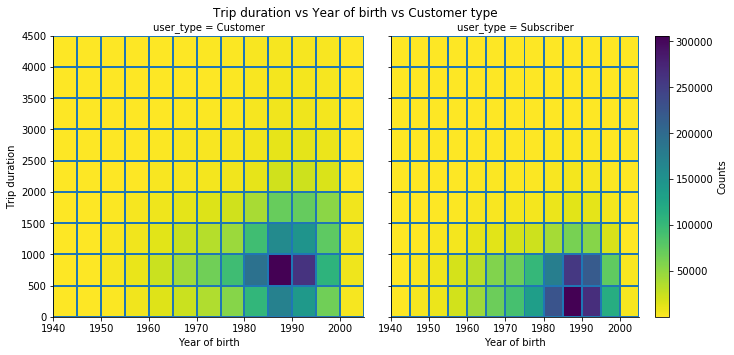

In [36]:
xbin = np.arange(1940, df['member_birth_year'].max()+5, 5)
ybin = np.arange(0, 4039.5+500, 500)

g = sns.FacetGrid(data = df, col = 'user_type',height=5)
g.map(plt.hist2d, 'member_birth_year','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar().set_label('Counts');

## code copie from
## https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Trip duration vs Year of birth vs Customer type");

g.set_ylabels("Trip duration");
g.set_xlabels("Year of birth");

## Summary:
<li><strong>User Type</strong></li>
       <ul>
           <li><strong>subscribers are:</strong></li>
               <ul>
                   <li>more likey to travel from 500 to 1500m</li>
                   <li>more likey to be between 20 - 30 year old</li>
                   <li>more likey travel a duration of 0 to 500s</li>
               </ul>
           <li><strong>customers are:</strong></li>
                <ul>
                   <li>more likey to travel from 1000 to 2000m</li>
                   <li>more likey to be between 20 - 30 year old</li>
                   <li>more likey to travel a duration of 500 to 1000s</li>
               </ul>
       </ul>